Experiment 39 - Vehicle Detection using Contours


Saving Screenshot 2026-02-16 214502.png to Screenshot 2026-02-16 214502 (3).png
INPUT IMAGE:


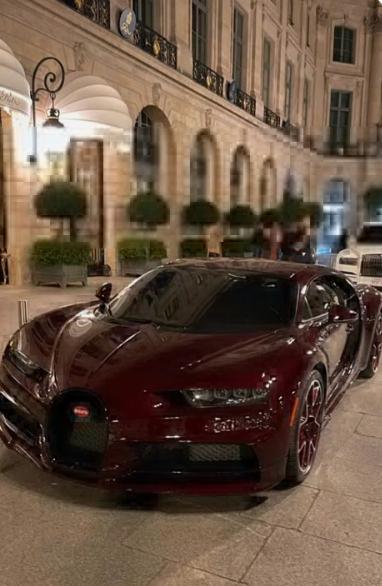

OUTPUT IMAGE (Detected Vehicles):


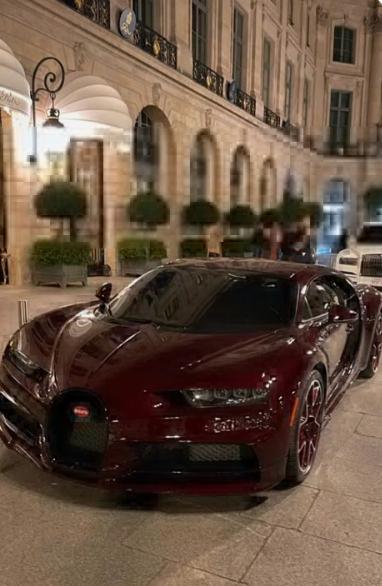

In [88]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

print("Experiment 39 - Vehicle Detection using Contours")

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)

if img is None:
    print("Error loading image")
else:
    print("INPUT IMAGE:")
    cv2_imshow(img)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around large contours
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 1000:   # filter small objects
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    print("OUTPUT IMAGE (Detected Vehicles):")
    cv2_imshow(img)
